# Cleaning data

In [404]:
# libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [405]:
# folders of imported files
folder_std = r'C:\Users\ciril\OneDrive\Desktop\ADA\MovieSummaries'

In [406]:
# import data. We will use the movie.metadata.tsv file
col_names = ['wikiID','freeID','movie_name','release_date','revenue','runtime','languages','countries','genres']
movies = pd.read_csv(folder_std + "\\movie.metadata.tsv",sep='\t',names=col_names)
movies.head()

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [407]:
# the column release date is set to be a datetime object. We have two different formats. we solve this using a mask
release_date = pd.to_datetime(movies['release_date'],errors='coerce')
mask = release_date.isna()
second_format = pd.to_datetime(movies['release_date'][mask],format='%Y',errors='coerce')
release_date[mask] = second_format
movies['release_date'] = release_date

In [408]:
# Convert the countries column to a list of countries
movies['countries'] = movies['countries'].apply(lambda x: list(json.loads(x).values()))
print('This is the movies dataframe we will use for the rest of the project')
movies.head()

This is the movies dataframe we will use for the rest of the project


,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",[Norway],"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",[United Kingdom],"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}",[Germany],"{""/m/07s9rl0"": ""Drama""}"


# Movies per year

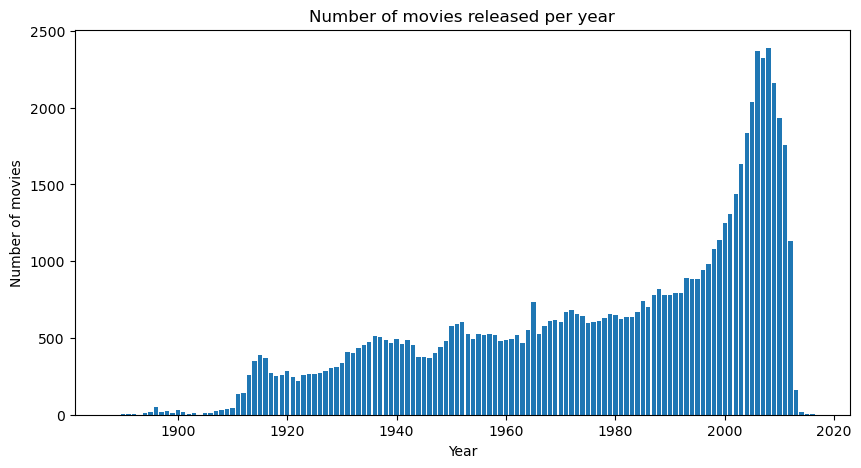

In [409]:
# we want to plot the number of movies released per year
# we group by year and count the number of movies
yearly_movies = movies.groupby(movies['release_date'].dt.year)['release_date'].count().reset_index(name='count')


# plot the number of movies per year
plt.figure(figsize=(10,5))
plt.bar(yearly_movies['release_date'],yearly_movies['count'])
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies released per year')
plt.show()

In [410]:
# we want to know how many movies were released before and after the year 2001, since this is the year of the twin towers attack
count_before2001 = yearly_movies[yearly_movies['release_date']<2001]['count'].sum()
count_after2001 = yearly_movies[yearly_movies['release_date']>=2001]['count'].sum()
print(f'Movies before the year 2001 are {count_before2001}')
print(f'Movies after the year 2001 are {count_after2001}')
print(f'The ratio of movies after the year 2001 is {count_after2001/(count_after2001+ count_before2001):.2}')  

Movies before the year 2001 are 49056
Movies after the year 2001 are 22488
The ratio of movies after the year 2001 is 0.31


The twin tower event has a relevant amount of films before (arounf 69%) and after (31%). This is a first sign that we can work analysing it through movies. 

Now, to really study arab actors, we read the actors df and work on the ethnicities.

# Ethnicity analysis (better in Filippo's version)

In [411]:
# Read the character.metadata.tsv file
col_names = ['wikiID','freeID','release_date','character_name','birth','gender','height','ethnicity_code', 'actor_name', 'age_at_release', 'freeID_character_actor_map', 'freeID_character', 'freeID_actor']
characters= pd.read_csv(open(folder_std + "\\character.metadata.tsv",encoding='utf-8'), delimiter="\t", names=col_names)

characters.head()

,wikiID,freeID,release_date,character_name,birth,gender,height,ethnicity_code,actor_name,age_at_release,freeID_character_actor_map,freeID_character,freeID_actor
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


We use a merge to join movies and character dataframes. We use the freeID and wikiID, (identifiers for movies) as keys

In [412]:
# merge the two dataframes on the wikiID and freeID
movies_characters = pd.merge(movies, characters, on=['freeID', 'wikiID'], how='inner', suffixes=('', '_y'))

# we drop the duplicate columns
movies_characters=movies_characters.drop(['release_date_y'], axis=1)

In [413]:
movies_characters.head(2)

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres,character_name,birth,gender,height,ethnicity_code,actor_name,age_at_release,freeID_character_actor_map,freeID_character,freeID_actor
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


We want to study the ethnicity column. Analysing the freebase ID we want to get who is arab

In [414]:
# print the number of Actor ethnicities (Freebase ID)
eth_num = movies_characters['ethnicity_code'].unique().shape[0]
print(f'There are {eth_num} different ethnicities')


There are 480 different ethnicities


How to decode the Freebase ID to a precise ethnicity? We used a query command to the freebase API and got a database to work on.

In [415]:
# read the csv file where we decode the ethnicities ID
ethnicity_decode = pd.read_csv(folder_std + "\\ethnicity.csv",sep=',')
ethnicity_decode.columns= ['ethnicity_code', 'ethnicity_name']
ethnicity_decode.head()

,ethnicity_code,ethnicity_name
0,/m/07s8n27,Makonde people
1,/m/02k1vf,Powhatan
2,/m/0630vt,Apalachee people
3,/m/038cy,Germanic peoples
4,/m/03gq7tt,Hän people


In [416]:
# merging the two dataframes
movies_characters_eth= pd.merge(movies_characters, ethnicity_decode, how='left', left_on=['ethnicity_code'], right_on=['ethnicity_code'])
movies_characters_eth.head(2)

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres,character_name,birth,gender,height,ethnicity_code,actor_name,age_at_release,freeID_character_actor_map,freeID_character,freeID_actor,ethnicity_name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN


We want to find the distribution of ethnicities in the dataset. 

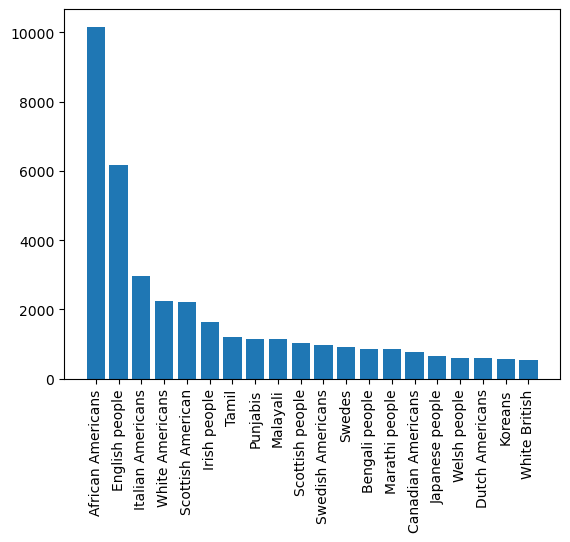

In [417]:
ethnicity_count = movies_characters_eth.groupby(movies_characters_eth['ethnicity_name'])['ethnicity_name'].count().reset_index(name = 'count')

ethnicity_count = ethnicity_count.sort_values(by='count',ascending=False)
plt.bar(ethnicity_count['ethnicity_name'].iloc[:20],ethnicity_count['count'].iloc[:20])
plt.xticks(rotation=90)
plt.show()

In [418]:
print('In total, there are {} ethnicities of which we know the name.'.format(ethnicity_count['ethnicity_name'].shape[0]))

In total, there are 320 ethnicities of which we know the name.


I asked ChatGPT to generate a list of which ethnicities can be considered Arabic. 

<font color="red">ADD MUSLIMS</font>


In [419]:
arabic_ethnicities = ['Arabs', 'Moroccan Americans', 'Lebanese Americans', 'Syrian Americans', 'Iraqi Americans', ]

arabs_count = ethnicity_count[ethnicity_count['ethnicity_name'].isin(arabic_ethnicities)]

In [420]:
print(f"From the ethnicities provided, only {arabs_count['count'].sum()} characters over the years are classified as arab characters.")

From the ethnicities provided, only 188 characters over the years are classified as arab characters.


# Arab names analysis

Another method to distinguish arab people inside the dataset could be identifying characters with an arab or muslim name.
A list of arab names (male and female) is retrieved from wikipedia and is contained in the file arab_names.txt.

In [421]:
# Read the file
with open(folder_std+'/arab_names.txt', 'r') as file:
    names = file.readlines()

# Clean and format the names (with list comprehension)
arab_names = [' '.join(name.strip().split(' ')[0:-1]) if '(name)' in name else ' '.join(name.strip().split(' ')[0:-2]) if '(given name)' in name else name.strip() for name in names]

arab_names = [str(item).lower() for item in arab_names]
print(arab_names)

['abbad', 'abbas', 'abd al-uzza', 'abdus salam', 'abd manaf', 'abd rabbo', 'abdel fattah', 'abdel nour', 'abdi', 'abdolreza', 'abdu', 'abdul', 'abdul ahad', 'abdul ali', 'abdul alim', 'abdul azim', 'abd al-aziz', 'abdul baqi', 'abdul bari', 'abdul basir', 'abdul basit', 'abdul ghaffar', 'abdul ghani', 'abdul hadi', 'abdul hafiz', 'abdul hai', 'abdul hakim', 'abdul halim', 'abdul hamid', 'abdul haq', 'abdul hussein', 'abdul jabbar', 'abdul jalil', 'abdul jamil', 'abdul karim', 'abdul khaliq', 'abdul latif', 'abdul majid', 'abdul malik', 'abdul mannan', 'abdul monem', 'abdul muttalib', 'abdul qadir', 'abdul qayyum', 'abdul quddus', 'abdul rashid', 'abdul samad', 'abdul sattar', 'abdul wadud', 'abdul wahhab', 'abdul wahid', 'abdul zahir', 'abdul zahra', 'abdullah', 'abdur rab', 'abdur rahim', 'abd al-rahman', 'abdur raqib', 'abdur rauf', 'abdur razzaq', 'abdus sabur', 'abdus shakur', 'abid', 'abidin', 'abla', 'abo', 'ab', 'abu abdullah', 'abu al-qasim', 'abu bakr', 'abu hafs', 'abu hamza'

In [422]:
movies_characters_eth['character_name'] = movies_characters_eth['character_name'].astype(str).str.lower()
movies_characters_eth.head(2)

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres,character_name,birth,gender,height,ethnicity_code,actor_name,age_at_release,freeID_character_actor_map,freeID_character,freeID_actor,ethnicity_name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",lieutenant melanie ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN


In [423]:
# Function to determin if the character name is an arab name
def filter_arab_names(name):
    for n in arab_names:
        if n in name.split():
            return True
        
    return False

The dataframe is filtered for what are designated as "arabic characters".

This line of code is the longest of the notebook to be executed.

In [424]:
movies_characters_eth_filtered = movies_characters_eth[movies_characters_eth['character_name'].apply(filter_arab_names)]

In [425]:
# Examples of character names classified as arab names
movies_characters_eth_filtered['character_name']

202                        rahim
564       i.s.i chief ishak khan
798                     amal raj
987                ali la pointe
991                       halima
                   ...          
447804             jamal hassani
448077                     nader
449075          rev. fred sultan
449653                bobby nair
450406              prince akeem
Name: character_name, Length: 1492, dtype: object

In [426]:
print('The number of characters with a name classified as arab is {}.'.format(movies_characters_eth_filtered['character_name'].shape[0]))

The number of characters with a name classified as arab is 1492.


In [427]:
movies_characters_eth_filtered.head(2)

,wikiID,freeID,movie_name,release_date,revenue,runtime,languages,countries,genres,character_name,birth,gender,height,ethnicity_code,actor_name,age_at_release,freeID_character_actor_map,freeID_character,freeID_actor,ethnicity_name
202,11448183,/m/02rc_h4,Bindiya Chamkegi,1984-01-20,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}",[India],"{""/m/0hqxf"": ""Family Film"", ""/m/01z4y"": ""Comedy""}",rahim,1923-11-11,M,NaN,/m/0dryh9k,Johnny Walker,60.0,/m/02vd0_r,/m/0h6_rbb,/m/07l4kn,NaN
564,4300418,/m/0bvx7h,The Hero: Love Story of a Spy,2003-04-11,NaN,182.0,"{""/m/03k50"": ""Hindi Language""}",[India],"{""/m/01jfsb"": ""Thriller"", ""/m/0cq22f9"": ""Actio...",i.s.i chief ishak khan,1932-06-22,M,NaN,/m/0dryh9k,Amrish Puri,70.0,/m/0k5bsd,/m/0h73qj8,/m/01k6nm,NaN


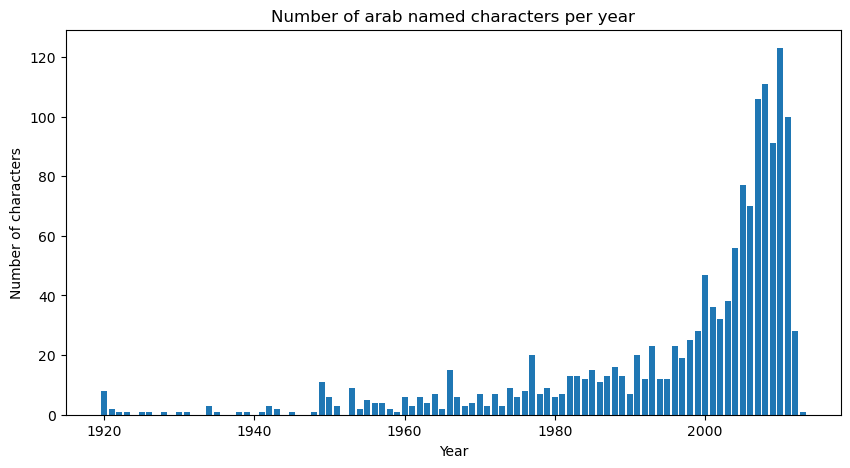

In [428]:
# How many movies with arab people per year
yearly_characters = movies_characters_eth_filtered.groupby(movies_characters_eth_filtered['release_date'].dt.year)['character_name'].count().reset_index(name='count')
plt.figure(figsize=(10,5))
plt.bar(yearly_characters['release_date'],yearly_characters['count'])

plt.xlabel('Year')
plt.ylabel('Number of characters')
plt.title('Number of arab named characters per year')
plt.show()

In [429]:
# classifying the movies as before and after 2001
count_before2001 = yearly_characters[yearly_characters['release_date']<2001]['count'].sum()
count_after2001 = yearly_characters[yearly_characters['release_date']>=2001]['count'].sum()
print(f'Arab named characters before the year 2001 are {count_before2001}')
print(f'Arab named characters after the year 2001 are {count_after2001}')
print('The total is less because some movies do not have the release date (NaN).')

Arab named characters before the year 2001 are 560
Arab named characters after the year 2001 are 869
The total is less because some movies do not have the release date (NaN).


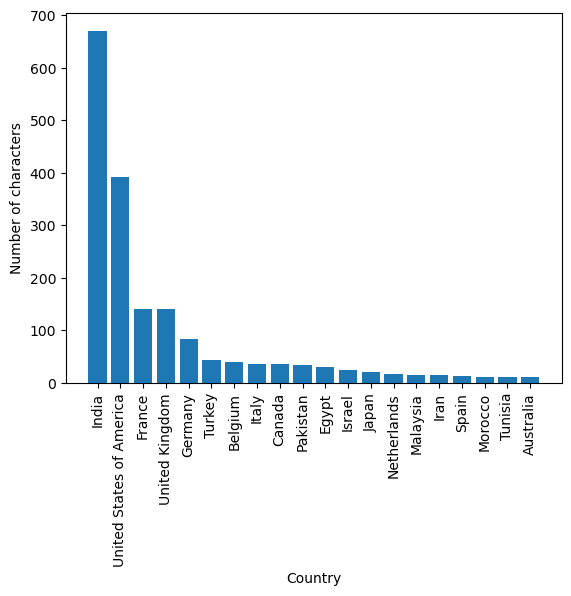

In [435]:
# Arab characters per country
exploded = movies_characters_eth_filtered.explode('countries')
country_counts = exploded['countries'].value_counts()

plt.bar(country_counts.index[:20],country_counts.values[:20])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of characters')
plt.show()

We are mainly interested in movies from USA.

In [436]:
# Arab movie characters from the USA
arab_usa = country_counts['United States of America']
print('The total number of characters from the USA is {}.'.format(arab_usa))

The total number of characters from the USA is 392.


In [437]:
# Arab movie characters from the USA before and after 2001
arab_usa_before = exploded[exploded['release_date'].dt.year<2001]['countries'].value_counts()['United States of America']
arab_usa_after = exploded[exploded['release_date'].dt.year>=2001]['countries'].value_counts()['United States of America']
print('The total number of characters from the USA before 2001 is {}.'.format(arab_usa_before))
print('The total number of characters from the USA after 2001 is {}.'.format(arab_usa_after))

The total number of characters from the USA before 2001 is 159.
The total number of characters from the USA after 2001 is 215.


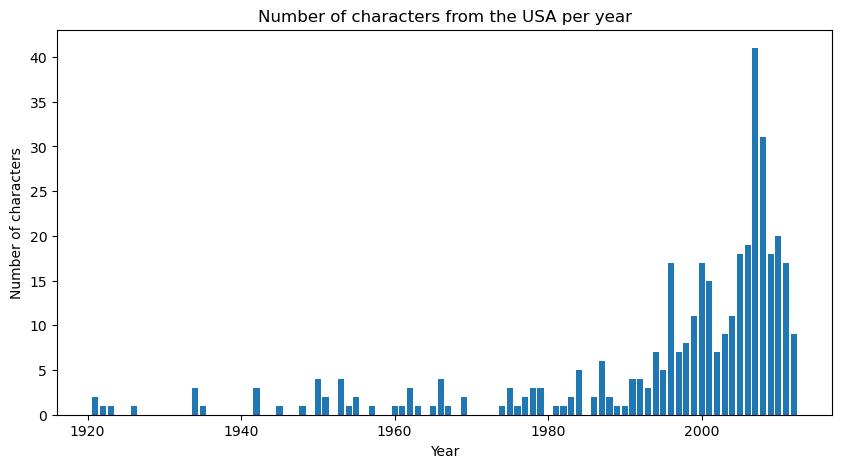

In [438]:
# Characters from the USA per year
usa_per_year = exploded[exploded['countries']=='United States of America']
usa_per_year = usa_per_year.groupby(usa_per_year['release_date'].dt.year)['release_date'].count()
plt.figure(figsize=(10,5))
plt.bar(usa_per_year.index,usa_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of characters')
plt.title('Number of characters from the USA per year')
plt.show()

As we are interested in macrocathegories, it can be useful to group cathegories of countries. The choice is done by taking the three countries with the most arabic characters, and consider all the rest as 'Others'.

The dataframe column 'countries' is thus reclassified with the three cathegories:
- United States of America
- India
- France
- Others

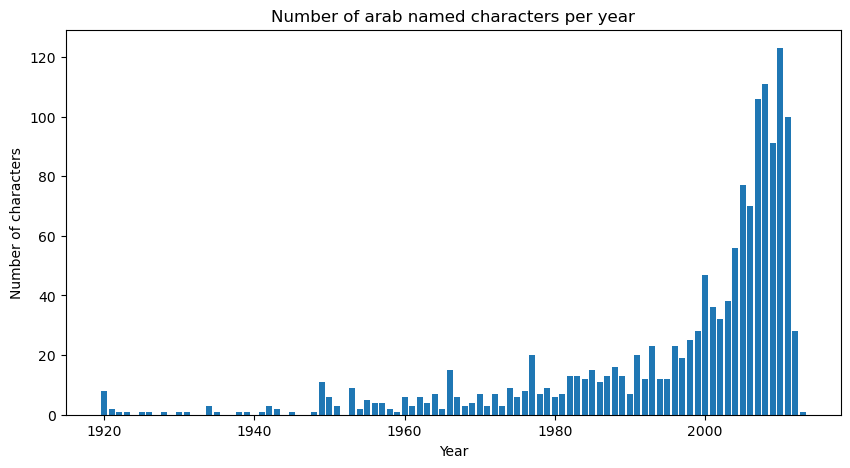

In [439]:
# Classify countries with USA, India and others
characters_main_countries = movies_characters_eth_filtered[movies_characters_eth_filtered['countries'].isin(['India','United States of America','France'])]

yearly_characters = movies_characters_eth_filtered.groupby(movies_characters_eth_filtered['release_date'].dt.year)['character_name'].count().reset_index(name='count')
plt.figure(figsize=(10,5))
plt.bar(yearly_characters['release_date'],yearly_characters['count'])

plt.xlabel('Year')
plt.ylabel('Number of characters')
plt.title('Number of arab named characters per year')
plt.show()

In [441]:
# Function that builds a mask for countries which contain one of the main countries
def filter_countries(country):
    for element in country:
        if element in ['India','United States of America','France']:
            return True
    return False

In [442]:
# Reduce the dataframe 'movies_characters_eth_filtered' to the main countries
main_countries_characters = movies_characters_eth_filtered[movies_characters_eth_filtered['countries'].apply(filter_countries)]

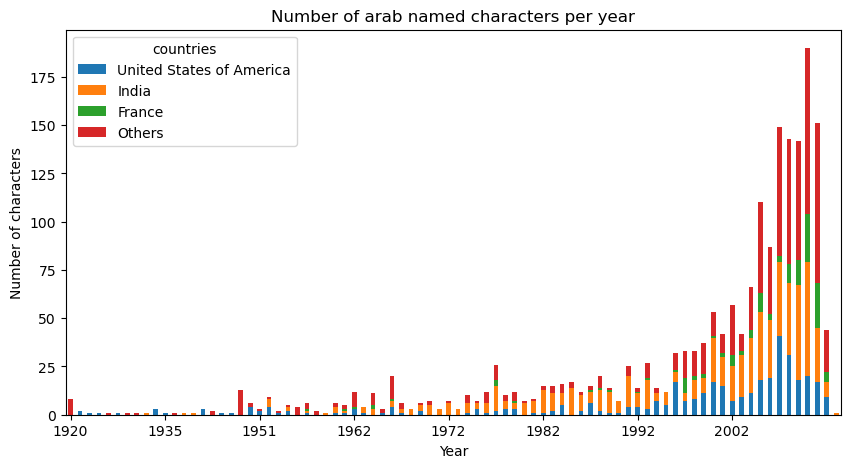

In [443]:
# Explode the countries column of the complete dataframe
exploded_main = movies_characters_eth_filtered.explode('countries')

# consider only United States of America, India and France and and substitute others with 'Others'
exploded_main['countries'] = exploded_main['countries'].apply(lambda x: x if x in ['United States of America','India','France'] else 'Others')

main_countries = exploded_main.groupby([exploded_main['release_date'].dt.year,exploded_main['countries']])['countries'].count().unstack()
# convert year index into integers
main_countries.index = main_countries.index.astype(int)
main_countries[['United States of America','India','France','Others']].plot(kind='bar', stacked=True, figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Number of characters')
plt.title('Number of arab named characters per year')
plt.xticks(np.arange(0, 80, 10),rotation=0)
plt.show()

# Check the presence of arab names in the plot

It is important to verify that the characters we are considering are present in the plot. In fact, only these characters can be used for a sentiment analysis in the further stages of the project.